In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [179]:
data=pd.read_csv('simulation/simulation_ran_balance.csv')

In [180]:
data.describe(include='all')

,ytrue,ypred,method,alf,type,t,prec
count,2520000.0,2.520000e+06,2520000,2.520000e+06,2016000,2.520000e+06,2520000
unique,NaN,NaN,7,NaN,4,NaN,2
top,NaN,NaN,LDAS,NaN,adpt,NaN,True
freq,NaN,NaN,2016000,NaN,504000,NaN,1970901
mean,0.5,4.979782e-01,NaN,-1.898667e-01,NaN,1.000000e+00,NaN
std,0.5,4.999960e-01,NaN,4.053507e-01,NaN,6.055302e-01,NaN
min,0.0,0.000000e+00,NaN,-1.000000e+00,NaN,0.000000e+00,NaN
25%,0.0,0.000000e+00,NaN,1.000000e-03,NaN,5.000000e-01,NaN
50%,0.5,0.000000e+00,NaN,5.000000e-03,NaN,1.000000e+00,NaN
75%,1.0,1.000000e+00,NaN,1.000000e-02,NaN,1.500000e+00,NaN


In [181]:
#datas=data[data.method=='LDAS']
datas=data.query("method=='LDAS'")

In [182]:
datas.head(10)

,ytrue,ypred,method,alf,type,t,prec
0,0,1,LDAS,0.05,hard,0.0,False
1,1,0,LDAS,0.05,hard,0.0,False
2,0,0,LDAS,0.05,hard,0.0,True
3,1,1,LDAS,0.05,hard,0.0,True
4,0,0,LDAS,0.05,hard,0.0,True
5,1,0,LDAS,0.05,hard,0.0,False
6,0,0,LDAS,0.05,hard,0.0,True
7,1,1,LDAS,0.05,hard,0.0,True
8,0,1,LDAS,0.05,hard,0.0,False
9,1,1,LDAS,0.05,hard,0.0,True


In [183]:
np.unique(datas.alf)

array([0.001 , 0.0025, 0.005 , 0.0075, 0.01  , 0.05  ])

In [184]:
datas['alpha']='alpha='+datas.alf.astype('str')

D:\Anoconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


in order to make alf recognized as factor by hue in seaborn, convert alf into string that unablt to be interpreted as numric

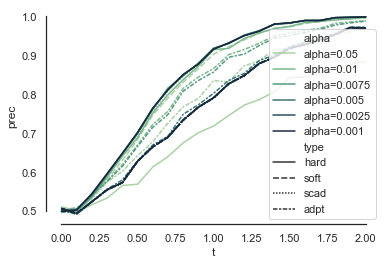

In [185]:
sns.set(style="white")
sns.lineplot(x="t", y="prec",
             hue="alpha",style='type',
             palette="ch:r=-.5,l=.75",
             data=datas,ci=None)
sns.despine(trim=True)

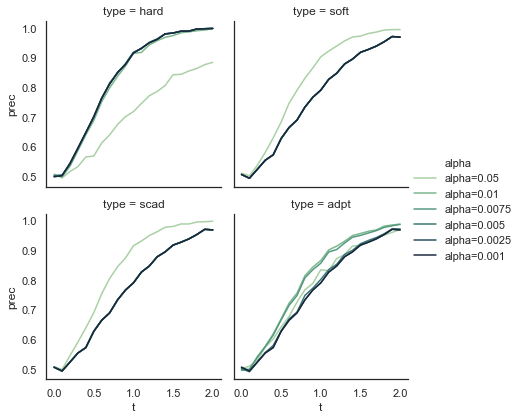

In [186]:
sns.set(style="white")
sns.relplot(x="t", y="prec",
            hue="alpha",
            col='type',col_wrap=2,height=3,
            palette="ch:r=-.5,l=.75",kind='line',
            data=datas,ci=None)

In [187]:
data_method=data[(data.method!='LDAS')]

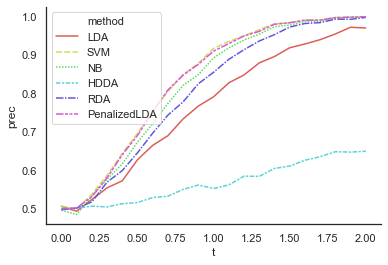

In [188]:
sns_plot=sns.lineplot(x="t", y="prec", 
                      hue='method',style="method",
                      palette=sns.color_palette("hls", 6),
                      data=data_method,ci=None)
sns.despine()

In [119]:
fig = sns_plot.get_figure()
fig.savefig('method.eps', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [149]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
palette

[[0.9072879094300372, 0.7554704536803714, 0.7462376322879748],
 [0.8285819344135655, 0.5939685136446344, 0.6506580690069503],
 [0.7112429433992273, 0.44706244471928347, 0.582154114273226],
 [0.5475925095088021, 0.3183394743439307, 0.5067755143579389],
 [0.3615667891876727, 0.2135460683528729, 0.39972110388915943],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

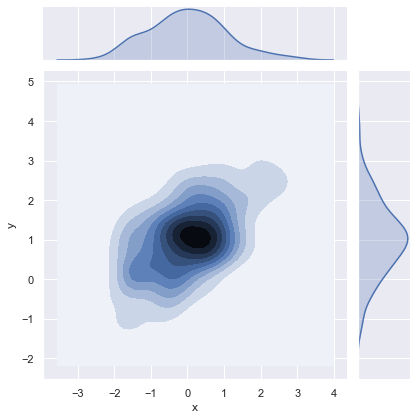

In [161]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df, kind="kde");

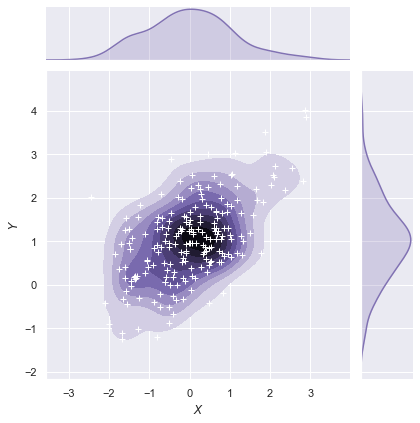

In [163]:
import matplotlib.pyplot as plt
from scipy import stats
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");